In [1]:
import torch

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:03<00:00, 2592903.00it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 155032.26it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1575463.97it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 1135853.13it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [5]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


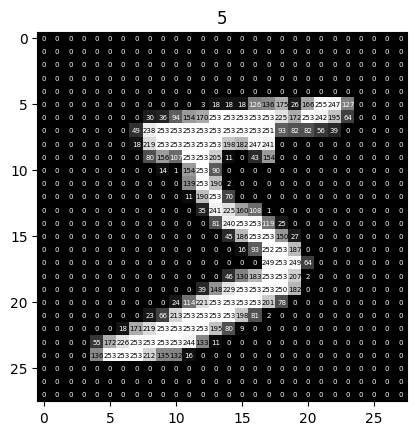

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(train_data.data[0], cmap='gray')

for i in range(train_data.data[0].shape[0]):
    for j in range(train_data.data[0].shape[1]):
        c = 1 if train_data.data[0][i,j].item() < 128 else 0
        ax.text(j,i,str(train_data.data[0][i,j].item()),color=(c,c,c), ha='center',va='center',fontsize=5)

plt.title('%i' % train_data.targets[0])
plt.show()

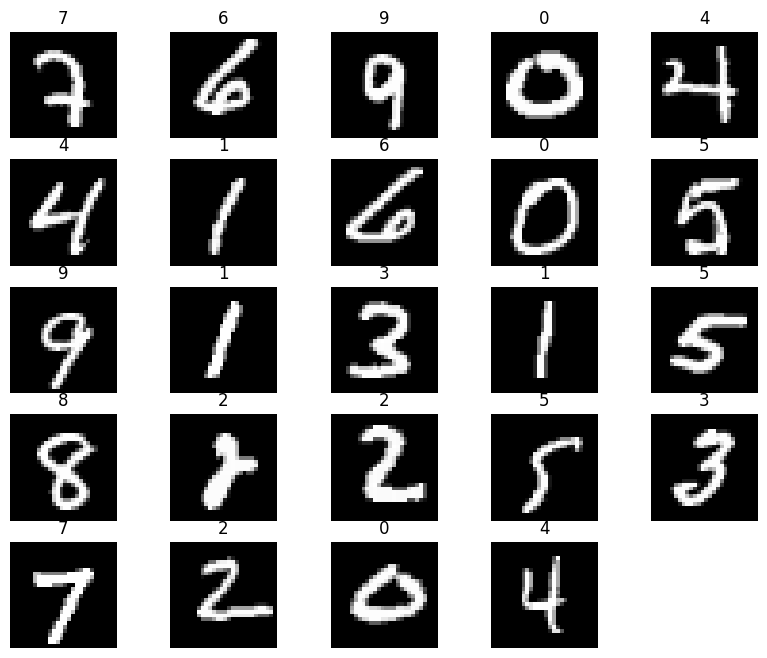

In [7]:
figure = plt.figure(figsize=(10,8))
cols, rows = 5, 5
for i in range(1, cols * rows * 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img,label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'test' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1f7f3bdca00>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1f7f3bdce80>}

In [9]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1,16,kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16,32,kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = torch.nn.Linear(32*7*7, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [10]:
model = CNN()

model

In [11]:
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [12]:
learning_rate = 0.01
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
training_epochs = 10

In [14]:
total_batch = len(loaders['train'])
for epoch in range(training_epochs):
    avg_cost = 0

    for x,y in loaders['train']:
        optimizer.zero_grad()
        pred = model(x)
        cost = loss_func(pred, y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4} cost = {:>9}'.format(epoch + 1, avg_cost))

print('Learning Complete')
        

[Epoch:    1 cost = 0.13970912992954254
[Epoch:    2 cost = 0.05478233844041824
[Epoch:    3 cost = 0.048318129032850266
[Epoch:    4 cost = 0.04314063489437103
[Epoch:    5 cost = 0.04158009588718414
[Epoch:    6 cost = 0.043270543217659
[Epoch:    7 cost = 0.036279864609241486
[Epoch:    8 cost = 0.03931707516312599
[Epoch:    9 cost = 0.03694698587059975
[Epoch:   10 cost = 0.0391886904835701
Learning Complete


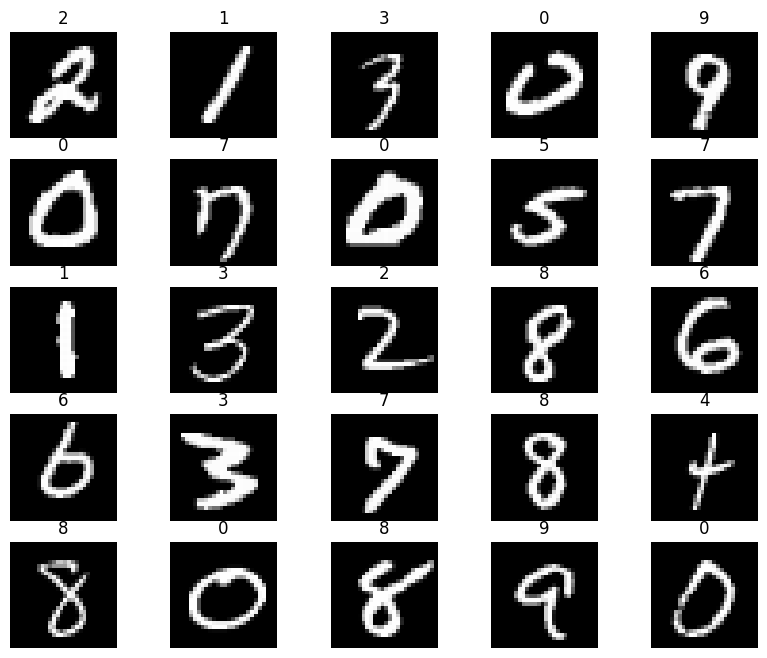

In [15]:
model.eval()
figure = plt.figure(figsize=(10,8))
cols, rows = 5,5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    test_output = model(torch.unsqueeze(loaders['test'].dataset[sample_idx][0],dim=0))
    label = torch.argmax(test_output)
    figure.add_subplot(rows, cols, i)
    plt.title(label.numpy())
    plt.axis("off")
    plt.imshow(loaders['test'].dataset[sample_idx][0].squeeze().detach().numpy(), cmap='gray')
plt.show()

In [16]:
torch.save(model, r"C:\Users\samsung-user\flab\model.pth")